## Notebook 11: Distribuição da média, testes de hipótese e o teorema do limite central
Neste Notebook, começamos por investigar a distribuição da média de um conjunto de dados, simulamos vários testes de hipótese e terminamos a explorar o teorema do limite central.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

Considere um conjunto de dados com 100 pontos. Os dados são obtidos a partir de uma distribuição normal com uma média de 4 e um desvio padrão de 2. Tal como verificámos anteriormente, a média amostral de 100 pontos de dados difere quase sempre de 4. E sempre que geramos um novo conjunto de 100 pontos, a média será ligeiramente diferente.

In [2]:
for i in range(5):
    a = 2 * rnd.standard_normal(100) + 4
    print('média a:', np.mean(a))

média a: 3.76487331266
média a: 4.01458154798
média a: 3.92486290191
média a: 3.92775439807
média a: 3.91671697778


De facto, a média do próprio conjunto de dados pode ser considerada uma variável aleatória com uma distribuição própria.

### Desvio padrão da amostra
O desvio padrão da amostra $s_n$ de um conjunto de dados com $n$ valores é definido como:

$s_n = \sqrt{ \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline{x}_n)^2 }$

e pode ser calculado com a função `std` do pacote `numpy`. Por predefinição, a função `std` divide a soma por $n$, em vez de $n−1$. Para dividir por $n−1$, conforme queremos para uma estimativa objetiva do desvio padrão, especifique o argumento de palavra-chave `ddof=1` na função `np.std`.

### <a name="back1"></a>Exercício 1. Histograma das médias de conjuntos de dados com 100 valores
Gere 1000 conjuntos de dados, cada um com 100 valores obtidos de uma distribuição normal com média de 4 e desvio padrão de 2; utilize um seed de 22. Calcule a média de cada conjunto de dados e armazene-os num array de comprimento 1000. Calcule a média das médias e o desvio padrão das médias e apresente no ecrã. Crie uma boxplot das médias. Numa figura em separado, crie um histograma das médias. Certifique-se de que o eixo vertical da boxplot e o eixo horizontal do histograma vão de 3 a 5.

<a href="#ex1answer">Soluções do Exercício 1</a>

### <a name="back2"></a>Exercício 2. Histograma das médias de conjuntos de dados com 1000 valores
Repita o exercício 1, mas agora gere 1000 conjuntos de dados, cada um com 1000 valores (em vez de 100 valores), obtidos da mesma distribuição normal com média de 4 e desvio padrão de 2, e novamente com um seed de 22. Certifique-se de que o eixo vertical da boxplot e o eixo horizontal do histograma vão de 3 a 5 para que os gráficos possam ser comparados com os que foram criados no exercício anterior. A diferença na média é muito mais pequena do que a dos conjuntos de dados que tinham apenas 100 valores?

<a href="#ex2answer">Soluções do Exercício 2</a>

### Desvio padrão da amostra da média amostral
O histograma das médias assemelha-se à curva em forma de sino de uma distribuição Normal, mas poderá recordar-se de que se trata, na verdade, de uma distribuição $t$ de Student, também designada meramente distribuição $t$. Uma distribuição $t$ surge quando estimamos a média de uma variável distribuída normalmente em situações em que o tamanho da amostra é relativamente pequeno e o desvio padrão é desconhecido (como geralmente acontece na prática) e tem de ser estimada a partir dos dados.

A média amostral de um conjunto de dados com $n$ valores é habitualmente escrita como $\overline{x}_n$, enquanto o desvio padrão da amostra é escrito como $s_n$ (conforme indicado acima). Aqui, calculamos o desvio padrão da amostra das médias amostrais, que escrevemos como $\hat{s}_n$ para um conjunto de dados de tamanho $n$. Na teoria, o valor do desvio padrão da amostra da média amostral $\hat{s}_n$ está relacionado com o desvio padrão da amostra como (consulte [aqui](http://en.wikipedia.org/wiki/Standard_deviation#Standard_deviation_of_the_mean))

$\hat{s}_n = s_n / \sqrt{n}$

### Percentis da distribuição $t$
Poderá recordar-se de que o intervalo de 90% em torno da média para uma variável distribuída normalmente vai de $\mu-1.64\sigma$ a $\mu+1.64\sigma$. Por outras palavras, espera-se que 5% dos dados estejam abaixo de $\mu-1.64\sigma$ e 5% estejam acima de $\mu+1.64\sigma$. E se se esquecer de que é $1.64\sigma$ para a esquerda e direita da média? Ou se quiser saber o valor de outro percentil? Pode procurá-lo numa tabela com um livro de estatística (ou na web), ou usar a função de pontos percentuais `ppf`, que faz parte de qualquer função de distribuição estatística definida no pacote `scipy.stats`. A função `ppf` é o inverso da função de distribuição acumulada. Por exemplo, `ppf(0.05)` devolve o valor dos dados de modo a que a função de distribuição acumulada seja igual a 0.05 no valor devolvido. Para encontrar os valores de 5% e de 95%, escreva (lembre-se de que, por predefinição, a distribuição `norm` tem média de zero e desvio padrão de 1; pode especificar diferentes valores com os argumentos de palavra-chave `loc` e `scale`, respetivamente).

In [3]:
from scipy.stats import norm
xvalue_05 = norm.ppf(0.05)
xvalue_95 = norm.ppf(0.95)
print('5% limite:', xvalue_05)
print('95% limite:', xvalue_95)
print('verificar se funciona para 5%:', norm.cdf(xvalue_05))
print('verificar se funciona para 95%:', norm.cdf(xvalue_95))
# Em seguida, especificar uma média e um desvio padrão
xvalue_05_musig = norm.ppf(0.05, loc=20, scale=10) # mu = 20, sigma = 10
print('5% limite com mu=20, sig=10:', xvalue_05_musig)
print('verificação:', norm.cdf(xvalue_05_musig, loc=20, scale=10))

5% limite: -1.64485362695
95% limite: 1.64485362695
verificar se funciona para 5%: 0.05
verificar se funciona para 95%: 0.95
5% limite com mu=20, sig=10: 3.55146373049
verificação: 0.05


Existe uma função semelhante para a distribuição $t$. A distribuição $t$ assume um argumento adicional: o número de graus de liberdade, que é igual ao número de pontos de dados menos 1. Por exemplo, considere uma amostra com 40 pontos de dados, uma média amostral de 20 e um desvio padrão da amostra da média de 2. Depois, os percentis de 5 e 95 são:

In [4]:
from scipy.stats import t
xvalue_05 = t.ppf(0.05, 39, loc=20, scale=2)
xvalue_95 = t.ppf(0.95, 39, loc=20, scale=2)
print('5% limite:  ',xvalue_05)
print('95% limite: ',xvalue_95)
print('verificar se funciona para 5%:', t.cdf(xvalue_05, 39, loc=20, scale=2))
print('verificar se funciona para 95%:', t.cdf(xvalue_95, 39, loc=20, scale=2))

5% limite:   16.630249761
95% limite:  23.369750239
verificar se funciona para 5%: 0.0500000002153
verificar se funciona para 95%: 0.949999999785


### <a name="back3"></a>Exercício 3. Contar o número de médias fora do percentil 95
Regresse ao Exercício 1. Gere 1000 conjuntos de dados, cada um com 100 valores obtidos de uma distribuição normal com média de 4 e desvio padrão de 2. Para cada conjunto de dados, avalie se a média amostral se encontra dentro do percentil 95 da distribuição $t$ em torno de uma média real de 4 (o desvio padrão da média amostral é sempre diferente, claro). Conte o número de vezes em que a média amostral está fora do percentil 95 em torno da média real da distribuição $t$. Se a teoria estiver correta, claro, será o caso para cerca de 5% dos conjuntos de dados. Experimente cinco seeds diferentes e anote a percentagem de médias no conjunto de dados que se encontra fora do percentil 95 em torno da média real.

<a href="#ex3answer">Soluções do Exercício 3</a>

### <a name="back4"></a>Exercício 4. Test $t$ num conjunto de dados de 20 valores
Gere 20 pontos de dados a partir de uma distribuição Normal com uma média de 39 e um desvio padrão de 4. Use um seed de 2. Calcule e anote a média amostral e o desvio padrão da amostra do conjunto de dados e o desvio padrão da amostra da média amostral.

Se calculou corretamente, a média dos 20 pontos de dados gerados acima será de 38.16. Alguém agora indica que os 20 pontos de dados são obtidos a partir de uma distribuição com uma média de 40. É-lhe pedido que decida se a média real subjacente pode, de facto, ser 40. Em termos estatísticos, é-lhe pedido que efetue um teste de hipóteses para testar a hipótese nula de que a média é 40, em comparação com a hipótese alternativa de que a média não é 40, no nível de significância de 5%. Assim, é-lhe solicitado que efetue um teste $t$ bilateral. Tudo o que pode fazer no teste de hipóteses é tentar rejeitar a hipótese nula. Por isso, vamos experimentar fazer isso mesmo. A maioria dos livros de estatística tem uma receita básica para efetuar um teste $t$. Aqui vamos visualizar o teste $t$. Rejeitamos a hipótese nula se a média amostral estiver fora do intervalo de 95% em torno da média da distribuição $t$ correspondente. Se a média estiver dentro do intervalo de 95%, apenas podemos concluir que não existem provas suficientes para rejeitar a hipótese nula. Represente a função da densidade de probabilidade de uma distribuição $t$, com média de 40 e um desvio padrão igual ao desvio padrão da amostra da média amostral calculada acima. Represente as linhas verticais vermelhas que indicam os limites da esquerda e direita do intervalo de 95% em torno da média. Represente uma linha vertical preta na posição da média amostral calculada acima. Decida se pode rejeitar a hipótese nula de que a média é 40 e adicione essa informação como título da figura.

<a href="#ex4answer">Soluções do Exercício 4</a>

### <a name="back5"></a>Exercício 5. Testes de hipóteses em dados de vigas de madeira
Carregue o conjunto de dados das experiências em vigas de madeiras, armazenado no ficheiro `douglas_data.csv`. Em primeiro lugar, considere as primeiras 20 medições da resistência à flexão. Calcule a média amostral e o desvio padrão da média amostral. O fabricante afirma que a resistência à flexão média é de apenas 50 Pa. Efetue um teste $t$
(nível de significância de 5%) com hipótese nula de que a média é, de facto, 50 Pa e hipótese alternativa de que a média não é 50 Pa, usando a abordagem aplicada no Exercício 4.

Repita o teste $t$ acima, mas agora com todas as medições da resistência à flexão. Chegou à mesma conclusão?

<a href="#ex5answer">Soluções do Exercício 5</a>

### Teorema do limite central
Até agora, abordámos a distribuição da média amostral de um conjunto de dados sabendo que os dados foram obtidos de uma distribuição normal (exceto os dados da viga de madeira, mas esses eram muito semelhantes a uma distribuição Normal). Esta média amostral tem uma distribuição $t$ de Student, que aborda a distribuição Normal quando o conjunto de dados é grande. Na verdade, 100 pontos de dados já é suficiente para abordar a distribuição Normal bem de perto. Pode comprovar isto ao comparar, por exemplo, a função de pontos percentuais `ppf` de uma distribuição Normal com uma distribuição $t$ com 99 graus de liberdade, ou ao simplesmente representar graficamente a função `pdf` de ambas as distribuições:

percentil 95 Distribuição Normal:   1.64485362695
percentil 95 Distribuição t com n=99:  1.660391156


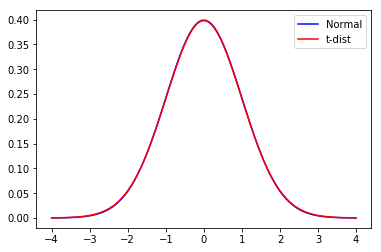

In [5]:
print('percentil 95 Distribuição Normal:  ',norm.ppf(0.95))
print('percentil 95 Distribuição t com n=99: ',t.ppf(0.95,99)) 
x = np.linspace(-4,4,100)
y1 = norm.pdf(x)
y2 = t.pdf(x,99)
plt.plot(x,y1,'b',label='Normal')
plt.plot(x,y2,'r',label='t-dist')
plt.legend();

O teorema do limite central diz agora que a distribuição da média amostral aborda a distribuição Normal no limite, mesmo que o conjunto de dados seja obtido a partir de uma distribuição totalmente diferente. Vamos testar este teorema ao retirar números de uma distribuição Gama. A distribuição Gama é uma distribuição distorcida e assume um parâmetro de forma $k$ e um parâmetro de escala $\theta$, sendo definida como $x>0$. Pode encontrar detalhes sobre a distribuição Gama, por exemplo, [aqui](http://en.wikipedia.org/wiki/Gamma_distribution). Vamos definir o parâmetro de forma igual a 2 e o parâmetro de escala igual a 1 (o que é a predefinição). Quando o parâmetro de escala é igual a 1, a média é igual ao parâmetro de forma. A `pdf` da distribuição Gama para estes valores é apresentada abaixo. A média é indicada pela linha vertical vermelha.

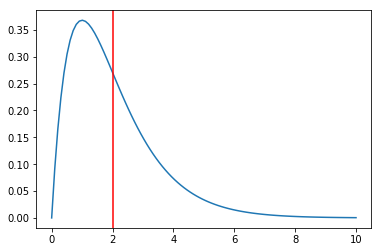

In [6]:
from scipy.stats import gamma
x = np.linspace(1e-6, 10, 100)
y = gamma.pdf(x, 2, scale=1)
plt.plot(x, y)
plt.axvline(2, color='r');

Podem ser obtidos números aleatórios de qualquer distribuição no pacote `scipy.stats` com a função `rvs`. Aqui, obtemos 1000 números e adicionamos o histograma à figura anterior.

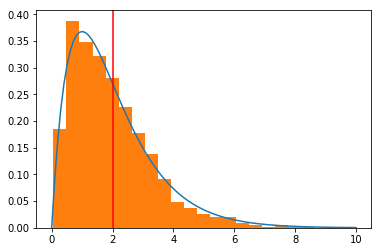

In [7]:
x = np.linspace(1e-6, 10, 100)
y = gamma.pdf(x, 2)
plt.plot(x, y)
plt.axvline(2, color='r')
data = gamma.rvs(2, size=1000)
plt.hist(data, bins=20, normed=True);

### <a name="back6"></a>Exercício 6. Explorar o teorema do limite central da distribuição Gama
Gere $N$ conjuntos de dados com 20 números obtidos aleatoriamente de uma distribuição Gama, com parâmetro de forma igual a 2 e de escala igual a 1. Represente um histograma das médias dos $N$ conjuntos de dados usando 20 bins. No mesmo gráfico, represente a `pdf` da distribuição Normal usando a média das médias e o desvio padrão da amostra das médias; selecione os limites do eixo $x$ entre 0 e 4. Crie 3 gráficos para $N=100,1000,10000$ e observe que a distribuição começa-se a aproximar de uma distribuição Normal. Adicione um título a cada gráfico, indicando o número de conjuntos de dados.

<a href="#ex6answer">Soluções do Exercício 6</a>

### Soluções dos exercícios

<a name="ex1answer">Soluções do Exercício 1</a>

A média das médias é: 4.00474211854
O desvio padrão das médias é: 0.190485481767


(3, 5)

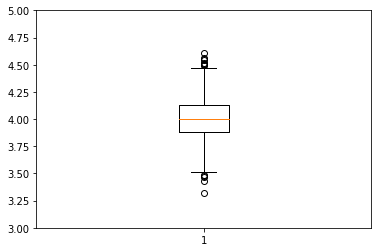

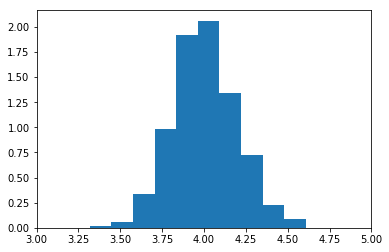

In [8]:
rnd.seed(22)
mean_of_data = np.mean(2 * rnd.standard_normal((1000, 100)) + 4, 1)
print('A média das médias é:', np.mean(mean_of_data))
print('O desvio padrão das médias é:', np.std(mean_of_data, ddof=1))
plt.figure()
plt.boxplot(mean_of_data)
plt.ylim(3, 5)
plt.figure()
plt.hist(mean_of_data, normed=True)
plt.xlim(3,5)

<a href="#back1">Voltar ao Exercício 1</a>

<a name="ex2answer">Soluções do Exercício 2</a>

A média das médias é: 4.00128131235
O desvio padrão das médias é: 0.0654148250988


(3, 5)

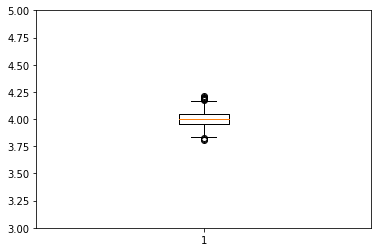

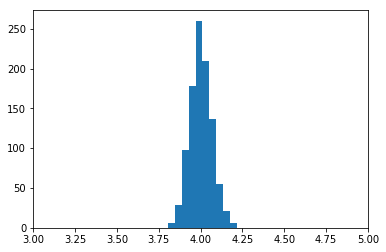

In [9]:
rnd.seed(22)
mean_of_data = np.mean(2 * rnd.standard_normal((1000, 1000)) + 4, 1)
print('A média das médias é:', np.mean(mean_of_data))
print('O desvio padrão das médias é:', np.std(mean_of_data, ddof=1))
plt.figure()
plt.boxplot(mean_of_data)
plt.ylim(3,5)
plt.figure()
plt.hist(mean_of_data)
plt.xlim(3, 5)

<a href="#back2">Voltar ao Exercício 2</a>

<a name="ex3answer">Soluções do Exercício 3</a>

In [10]:
from scipy.stats import t
for s in [22, 32, 42, 52, 62]:
    rnd.seed(s)
    data = 2.0 * rnd.standard_normal((1000, 100)) + 4.0
    mean = np.mean(data, 1)
    sighat = np.std(data, axis=1, ddof=1) / np.sqrt(100)
    count = 0
    for i in range(1000):
        low = t.ppf(0.025, 99, loc=4, scale=sighat[i])
        high = t.ppf(0.975, 99, loc=4, scale=sighat[i])
        if (mean[i] < low) or (mean[i] > high): count += 1
    print('percentagem de conjunto de dados onde a média amostral está fora do percentil 95:', count * 100 / 1000)

percentagem de conjunto de dados onde a média amostral está fora do percentil 95: 4.0
percentagem de conjunto de dados onde a média amostral está fora do percentil 95: 5.8
percentagem de conjunto de dados onde a média amostral está fora do percentil 95: 6.2
percentagem de conjunto de dados onde a média amostral está fora do percentil 95: 5.9
percentagem de conjunto de dados onde a média amostral está fora do percentil 95: 5.7


<a href="#back3">Voltar ao Exercício 3</a>

<a name="ex4answer">Soluções do Exercício 4</a>

In [11]:
rnd.seed(2)
data = 4 * rnd.standard_normal(20) + 39
mu = np.mean(data)
sig = np.std(data, ddof=1)
sighat = np.std(data, ddof=1) / np.sqrt(20)
print('média dos dados:', mu)
print('desvio padrão dos dados:', sig)
print('desvio padrão da média:', sighat)

média dos dados: 38.1627400469
desvio padrão dos dados: 4.46032692087
desvio padrão da média: 0.997359419693


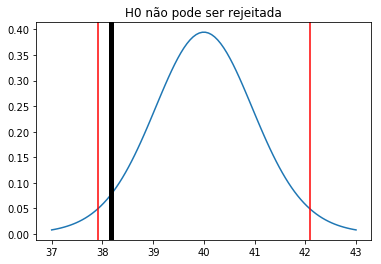

In [12]:
x = np.linspace(37, 43, 100)
y = t.pdf(x, 19, loc=40, scale=sighat)
plt.plot(x, y)
perc025 = t.ppf(0.025, 19, loc=40, scale=sighat)
perc975 = t.ppf(0.975, 19, loc=40, scale=sighat)
plt.axvline(perc025, color='r')
plt.axvline(perc975, color='r')
plt.axvline(mu, color='k', lw=5)
plt.title('H0 não pode ser rejeitada');

<a href="#back4">Voltar ao Exercício 4</a>

<a name="ex5answer">Soluções do Exercício 5</a>

média amostral, desvio padrão da média amostral:  69.37100000000001 3.50960830773


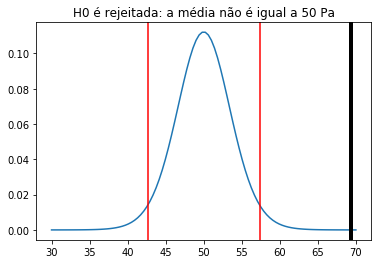

In [13]:
from pandas import read_csv
w = read_csv('douglas_data.csv', skiprows=[1], skipinitialspace=True)
mu20 = np.mean(w.bstrength[:20])
sig20 = np.std(w.bstrength[:20], ddof=1) / np.sqrt(20)
print('média amostral, desvio padrão da média amostral: ', mu20, sig20)
x = np.linspace(30,70,100)
y = t.pdf(x, 19, loc=50, scale=sig20)
plt.plot(x,y)
perc025 = t.ppf(0.025, 19, loc=50, scale=sig20)
perc975 = t.ppf(0.975, 19, loc=50, scale=sig20)
plt.axvline(perc025, color='r')
plt.axvline(perc975, color='r')
plt.axvline(mu20, color='k', lw=4)
plt.title('H0 é rejeitada: a média não é igual a 50 Pa');

média amostral, desvio padrão da média amostral:  48.65050561797753 0.903543631702


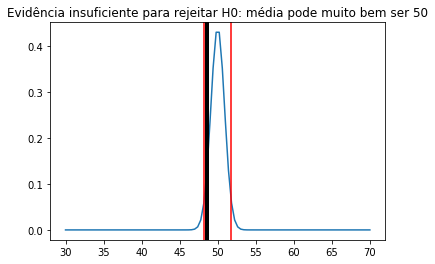

In [14]:
from pandas import read_csv
w = read_csv('douglas_data.csv', skiprows=[1], skipinitialspace=True)
N = len(w.bstrength)
mu = np.mean(w.bstrength)
sig = np.std(w.bstrength, ddof=1) / np.sqrt(N)
print('média amostral, desvio padrão da média amostral: ', mu, sig)
x = np.linspace(30, 70, 100)
y = t.pdf(x, N - 1, loc=50, scale=sig)
plt.plot(x, y)
perc025 = t.ppf(0.025, N - 1, loc=50, scale=sig)
perc975 = t.ppf(0.975, N - 1, loc=50, scale=sig)
plt.axvline(perc025, color='r')
plt.axvline(perc975, color='r')
plt.axvline(mu, color='k', lw=4)
plt.title('Evidência insuficiente para rejeitar H0: média pode muito bem ser 50');

<a href="#back5">Voltar ao Exercício 5</a>

<a name="ex6answer">Soluções do Exercício 6</a>

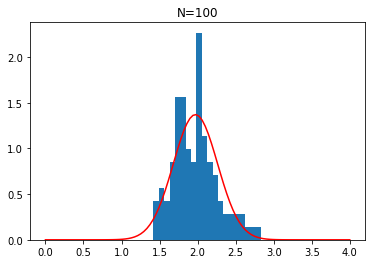

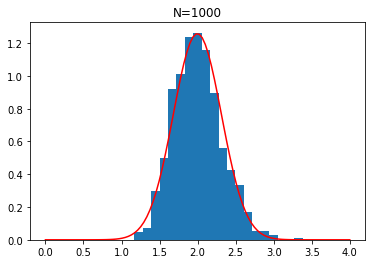

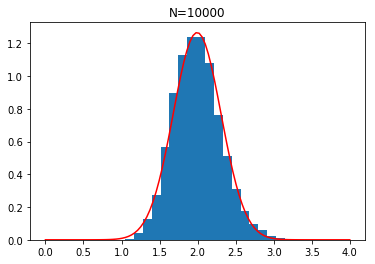

In [15]:
from scipy.stats import norm, gamma
for N in [100, 1000, 10000]:
    data = gamma.rvs(2, size=(N, 20))
    mean_of_data = np.mean(data, 1)
    mu = np.mean(mean_of_data)
    sig = np.std(mean_of_data, ddof=1)
    plt.figure()
    plt.hist(mean_of_data, bins=20, normed=True)
    x = np.linspace(0, 4, 100)
    y = norm.pdf(x, loc=mu, scale=sig)
    plt.plot(x, y, 'r')
    plt.title('N=' + str(N))

<a href="#back6">Voltar ao Exercício 6</a>

A obra "Notebook 11: Distribuição da média, testes de hipótese e o teorema do limite central" é um derivado de [Notebook 11: Distribution of the mean, hypothesis tests, and the central limit theorem](http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook11_hypothesis_test/py_exploratory_comp_11_sol.ipynb) de [mbakker7](https://github.com/mbakker7), sob a [licença CC BY (4.0 Licença Internacional)](https://creativecommons.org/licenses/by/4.0/deed.pt). "Notebook 11: Distribuição da média, testes de hipótese e o teorema do limite central" é publicado sob a [licença CC BY (4.0 Licença Internacional)](https://creativecommons.org/licenses/by/4.0/deed.pt) por Educa2030.